<a href="https://colab.research.google.com/github/jadrzy/ProjectPythonForMachineLearning/blob/main/CreatingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SETUP REPOSITORY
!git clone https://{token}@github.com/jadrzy/PythonForMachineLearning.git

Cloning into 'PythonForMachineLearning'...
remote: Enumerating objects: 317, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 317 (delta 89), reused 3 (delta 3), pack-reused 158 (from 1)
Receiving objects: 100% (317/317), 13.73 MiB | 7.53 MiB/s, done.
Resolving deltas: 100% (147/147), done.


In [2]:
import seaborn as sns
from time import time
import matplotlib.pyplot as plt
import pandas as pd

model_data = pd.read_csv("/content/PythonForMachineLearning/datasets/model_data.csv")
analize_data = pd.read_csv("/content/PythonForMachineLearning/datasets/analyze_data.csv")

print(model_data.columns.unique())

analyze_data = analize_data.drop(['ID'], axis=1)
model_data = model_data.drop(['ID'], axis=1)

Index(['ID', 'Age', 'Gender', 'Education', 'Neuroticism', 'Extraversion',
       'Openness to experience', 'Agreeableness', 'Conscientiousness',
       'Impulsiveness', 'Sensation seeking', 'Alcohol', 'Amphetamine',
       'Amyl nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate',
       'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal highs',
       'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semeron',
       'Volatile substance abuse', 'Country_Australia', 'Country_Canada',
       'Country_New Zealand', 'Country_Other', 'Country_Republic of Ireland',
       'Country_UK', 'Country_USA', 'Ethnicity_Asian', 'Ethnicity_Black',
       'Ethnicity_Mixed-Black/Asian', 'Ethnicity_Mixed-White/Asian',
       'Ethnicity_Mixed-White/Black', 'Ethnicity_Other', 'Ethnicity_White'],
      dtype='object')


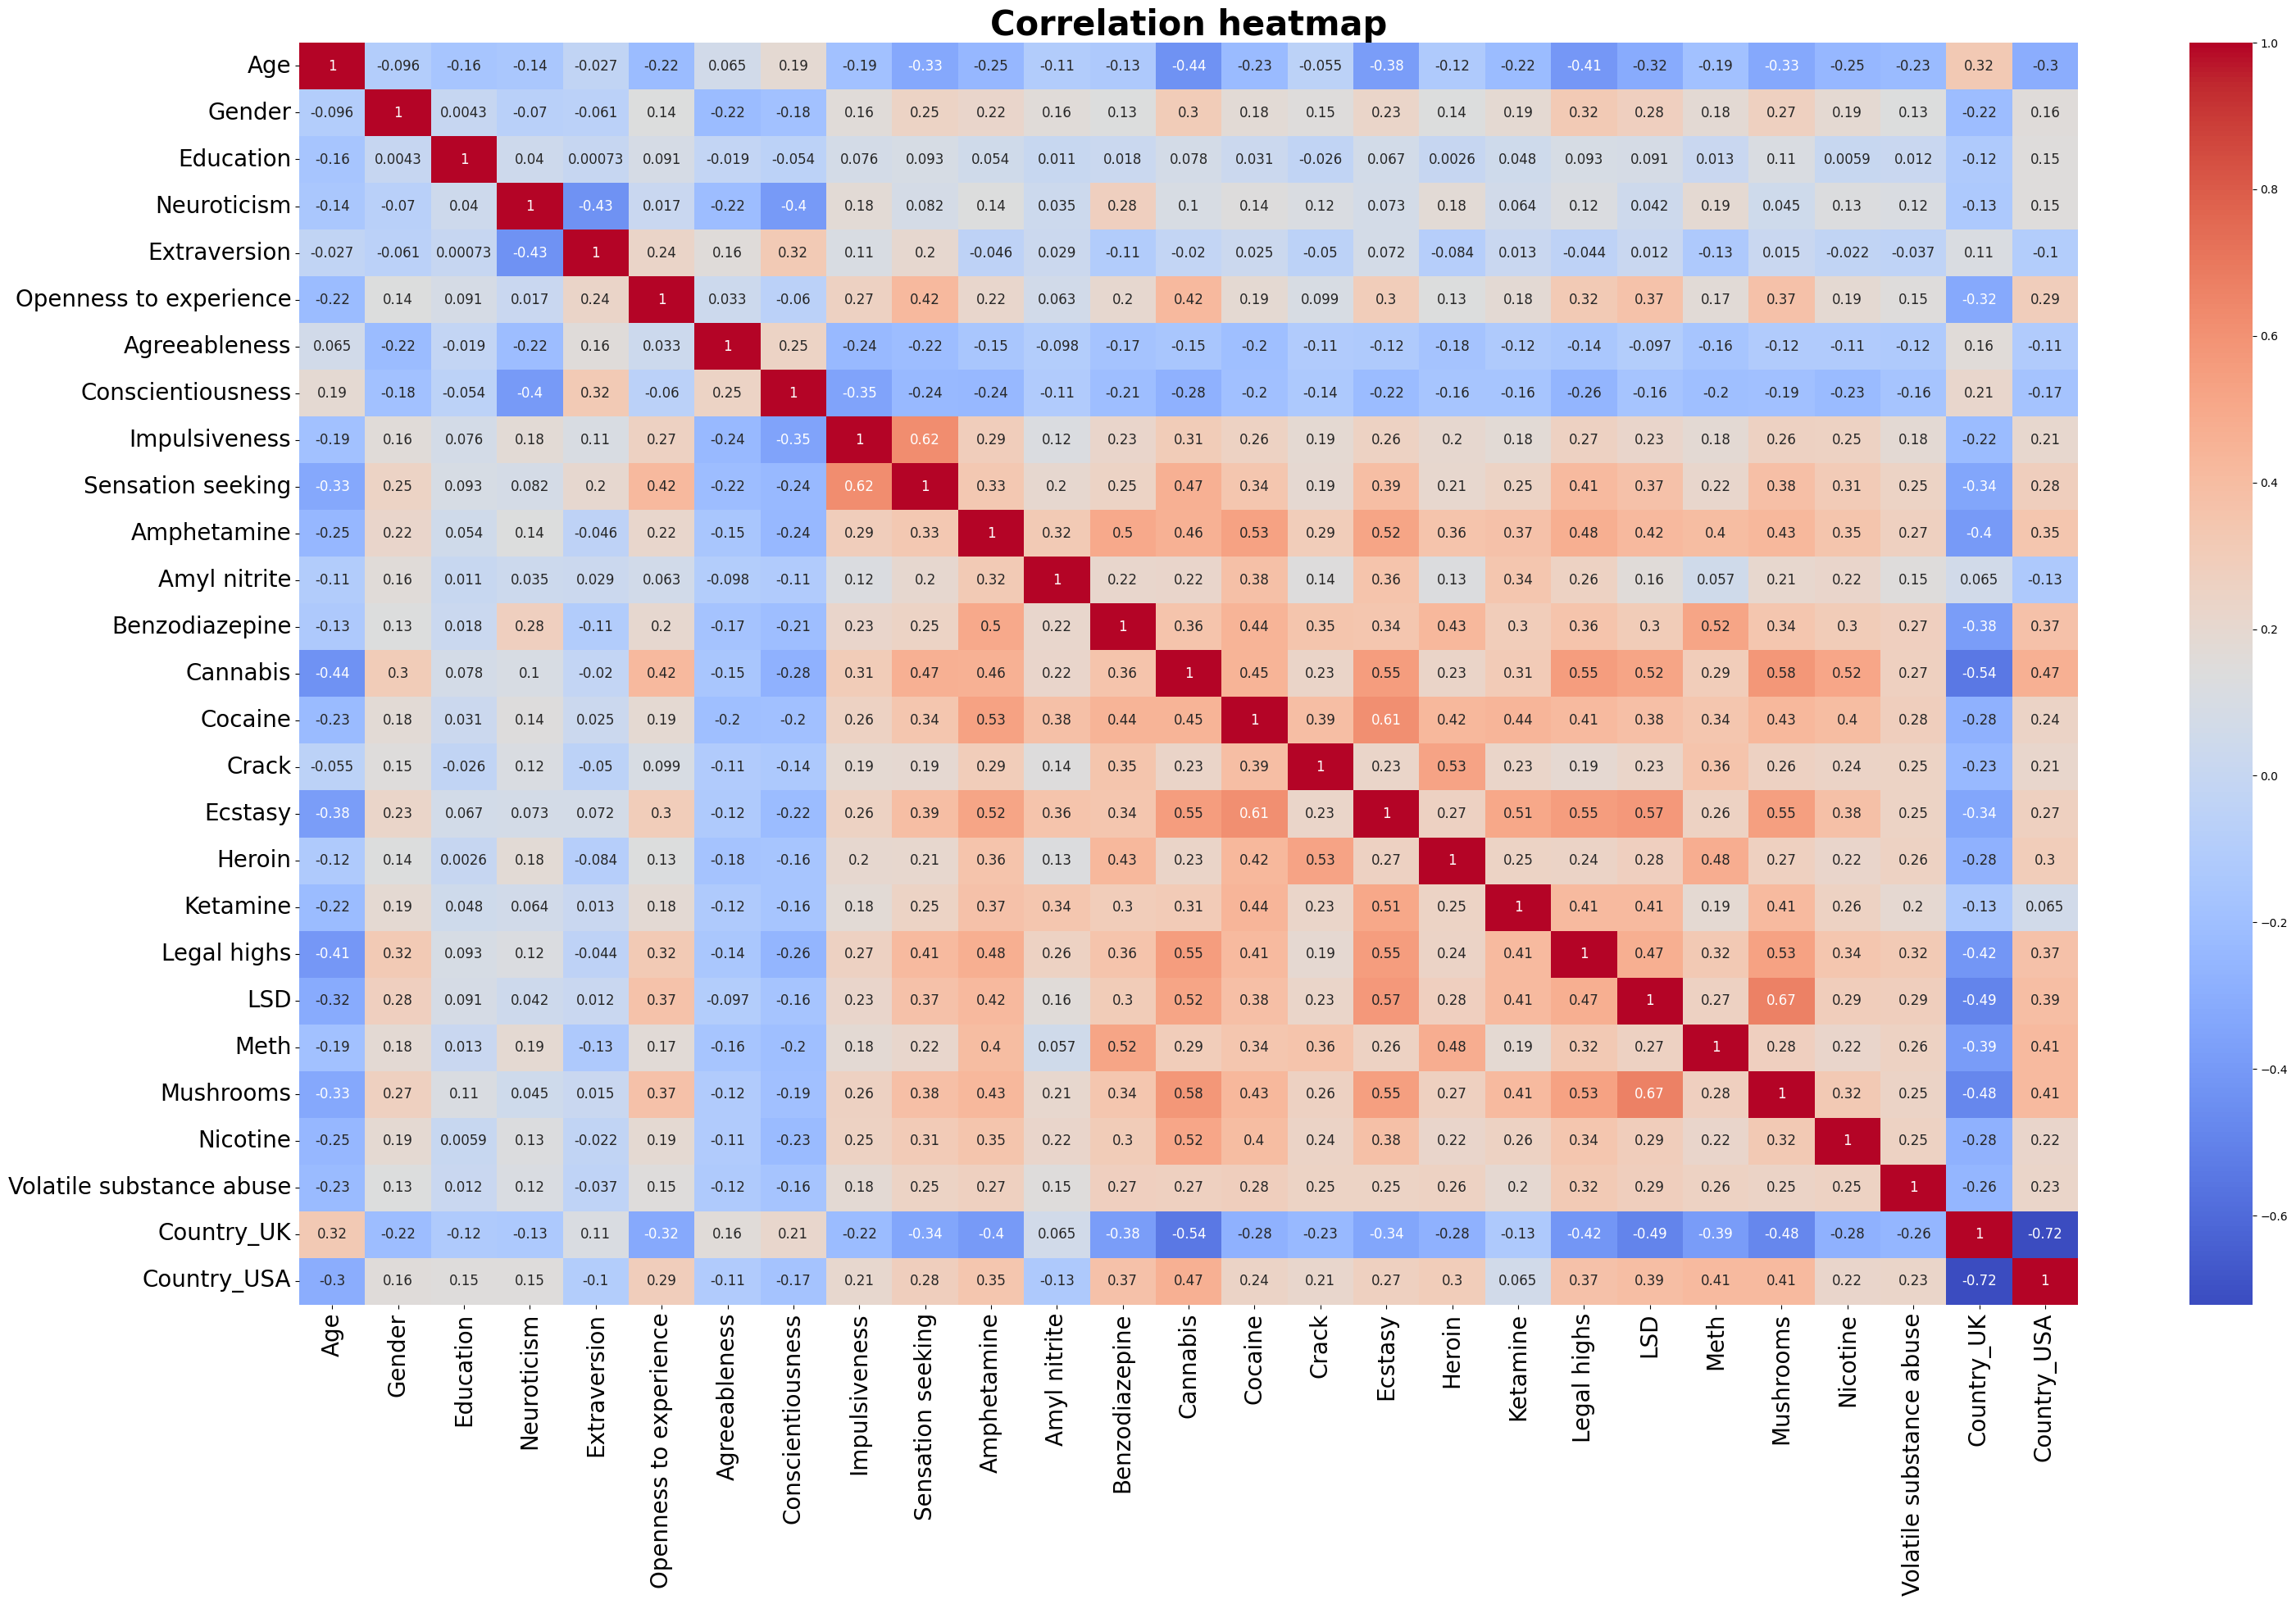

In [ ]:
selected_model_data = model_data.copy()
selected_model_data = selected_model_data.loc[:, ~model_data.columns.str.startswith('Ethnicity')].drop(['Semeron', 'Country_Australia', 'Country_Canada', 'Country_New Zealand', 'Country_Other', 'Country_Republic of Ireland', 'Alcohol', 'Caffeine', 'Chocolate'], axis=1)

selected_corr = selected_model_data.corr()
plt.figure(figsize=(35, 20))
sns.heatmap(selected_corr, cmap = 'coolwarm', annot = True, annot_kws={'size': 12})
plt.title('Correlation heatmap', fontsize=30, fontweight='bold')
plt.tick_params(axis='both', labelsize=20)
plt.show()

#Creating model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X= selected_model_data.drop(['Cannabis'], axis=1)
y= selected_model_data['Cannabis']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.4,random_state=1 )
X_valid, X_test, y_valid, y_test= train_test_split(X_test, y_test, test_size=0.5,random_state=1 )

In [ ]:
import numpy as np

reg = tree.DecisionTreeRegressor(random_state=1,max_depth=4)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.4101540851004386
1.564831888829659


In [ ]:
print(selected_model_data.columns.unique())

Index(['Age', 'Gender', 'Education', 'Neuroticism', 'Extraversion',
       'Openness to experience', 'Agreeableness', 'Conscientiousness',
       'Impulsiveness', 'Sensation seeking', 'Amphetamine', 'Amyl nitrite',
       'Benzodiazepine', 'Cannabis', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legal highs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine',
       'Volatile substance abuse', 'Country_UK', 'Country_USA'],
      dtype='object')


#Regression

##Features - hard drugs

In [ ]:
from sklearn.model_selection import train_test_split


X1= selected_model_data.drop(['Cannabis','Age', 'Gender', 'Education', 'Neuroticism', 'Extraversion',
       'Openness to experience', 'Agreeableness', 'Conscientiousness',
       'Impulsiveness', 'Sensation seeking', 'Country_UK', 'Country_USA'], axis=1)
y= selected_model_data['Cannabis']



X_train, X_test, y_train, y_test= train_test_split(X1, y, test_size=0.4,random_state=1 )
X_valid, X_test, y_valid, y_test= train_test_split(X_test, y_test, test_size=0.5,random_state=1 )
X1.head()

,Amphetamine,Amyl nitrite,Benzodiazepine,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Meth,Mushrooms,Nicotine,Volatile substance abuse
0,2,2,0,3,0,4,0,2,0,2,3,0,4,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,3,2,0,0,0,2,0,0,0,0,2,0
3,1,1,0,0,0,1,0,0,1,0,0,2,2,0
4,0,0,0,0,0,0,0,0,0,0,0,0,6,0


In [ ]:
y.head()


,Cannabis
0,4
1,3
2,2
3,3
4,0


 - Never Used = 0
 - Used over a Decade = 1
 - Used in Last Decade = 2
 - Used in Last Year = 3
 - Used in Last Month = 4
 - Used in Last Week = 5
 - Used in Last Day = 6

###PCA Data

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().set_output(transform="pandas").fit(X_train)
X1_train_pca = pca.transform(X_train)
X1_valid_pca = pca.transform(X_valid)
X1_test_pca = pca.transform(X_test)

In [ ]:
import numpy as np
from sklearn import tree
reg = tree.DecisionTreeRegressor(random_state=1,max_depth=4)
reg.fit(X1_train_pca, y_train)
y_pred_train = reg.predict(X1_train_pca)
y_pred = reg.predict(X1_valid_pca)

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.3720631952731495
1.5065060489893123


In [ ]:
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(X1_train_pca, y_train)
y_pred_train = reg.predict(X1_train_pca)
y_pred = reg.predict(X1_valid_pca)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.305865572537454
1.4643866310185851


###Without PCA

###Tree

In [ ]:
import numpy as np
from sklearn import tree
reg = tree.DecisionTreeRegressor(random_state=1,max_depth=4)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.4602049263988777
1.5381028124317135


###SVM

In [ ]:
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.335248703758876
1.468366075451459


###Kneighbours

In [ ]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(hidden_layer_sizes=(5,5,5,5), random_state=1, max_iter=1000, solver='lbfgs')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.2962324813566863
1.4782527897563091


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


###Kneigbours

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=25)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.45643132772863
1.489136612758845


###SVM

In [ ]:
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.335248703758876
1.468366075451459


##Features - Psychological tests

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
MinMaxScaler,
StandardScaler,
)

X2= selected_model_data.drop(['Cannabis','Cocaine', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legal highs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine',
       'Volatile substance abuse'], axis=1)
y= selected_model_data['Cannabis']

standard_scaler = StandardScaler().set_output(transform="pandas")
X2_s = standard_scaler.fit_transform(X2)

minmax_scaler = MinMaxScaler().set_output(transform="pandas")
X2_n = minmax_scaler.fit_transform(X2)

X_train, X_test, y_train, y_test= train_test_split(X2_s, y, test_size=0.4,random_state=1 )
X_valid, X_test, y_valid, y_test= train_test_split(X_test, y_test, test_size=0.5,random_state=1 )
X_train.head()

,Age,Gender,Education,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking,Amphetamine,Amyl nitrite,Benzodiazepine,Country_UK,Country_USA
1706,0.512350,-1.001062,-1.238857,-0.866922,-0.823779,0.795807,-0.911871,0.367921,-0.848961,-0.208753,-0.751453,-0.570631,-0.784566,0.897958,-0.647876
1646,-0.270511,-1.001062,0.950643,0.008773,1.539147,1.251798,1.263161,0.655005,1.508012,0.533306,-0.751453,-0.570631,-0.784566,0.897958,-0.647876
1429,-0.270511,-1.001062,-0.363057,0.337159,-0.971461,-0.572168,2.350677,1.372713,-1.320355,-1.321842,-0.751453,-0.570631,-0.784566,0.897958,-0.647876
1439,0.512350,-1.001062,-2.552557,-0.538537,0.948415,0.795807,0.952442,0.655005,-0.848961,-1.321842,-0.190765,-0.570631,-0.249014,0.897958,-0.647876
987,-1.053372,0.998939,0.512743,0.337159,1.686830,0.339815,-0.756511,-1.928747,1.979407,1.646394,1.491300,4.128096,0.822088,-1.113638,-0.647876


In [ ]:
model_data.head()

,Age,Gender,Education,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking,...,Country_Republic of Ireland,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
0,1,1,0,29,52,55,48,41,2,5,...,0,1,0,0,0,0,0,0,0,1
1,2,1,6,31,45,40,32,34,1,7,...,0,1,0,0,0,0,0,0,0,1
2,0,0,5,34,34,46,47,46,1,2,...,0,1,0,0,0,0,0,0,0,1
3,2,0,0,43,28,43,41,50,3,5,...,0,1,0,0,0,0,0,0,0,1
4,5,0,3,29,38,35,55,52,1,1,...,0,0,0,0,0,0,0,0,0,1


##Without PCA

###Linear

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.5402553103857426
1.5443129269773637


###KNeighbours

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=37)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.5650099961657338
1.6104497235537794


###ML

In [ ]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(hidden_layer_sizes=(7,6,6,6,6), random_state=1, max_iter=1000, solver='lbfgs')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.3518243880090586
1.5863368478609607


##PCA Data

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().set_output(transform="pandas").fit(X_train)
X2_train_pca = pca.transform(X_train)
X2_valid_pca = pca.transform(X_valid)
X2_test_pca = pca.transform(X_test)

###Tree

In [ ]:
import numpy as np
from sklearn import tree
reg = tree.DecisionTreeRegressor(random_state=1,max_depth=4)
reg.fit(X2_train_pca, y_train)
y_pred_train = reg.predict(X2_train_pca)
y_pred = reg.predict(X2_valid_pca)

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.472381193431578
1.700238162619994


###SVM

In [ ]:
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(X2_train_pca, y_train)
y_pred_train = reg.predict(X2_train_pca)
y_pred = reg.predict(X2_valid_pca)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.41837389088774
1.5571069060552782


###ML

In [ ]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(hidden_layer_sizes=(7,6,6,6,6), random_state=1, max_iter=1000, solver='lbfgs')
reg.fit(X2_train_pca, y_train)
y_pred_train = reg.predict(X2_train_pca)
y_pred = reg.predict(X2_valid_pca)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.2702775189245878
1.6315133566957967


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


###KNeighbours

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=37)
reg.fit(X2_train_pca, y_train)
y_pred_train = reg.predict(X2_train_pca)
y_pred = reg.predict(X2_valid_pca)
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
print(rmse)
rmse = np.sqrt(np.mean((y_pred - y_valid)**2))
print(rmse)

1.5650099961657338
1.6104497235537794


#Classification

##Searching for best meta parameters

In [ ]:



X1= selected_model_data.drop(['Cannabis','Age', 'Gender', 'Education', 'Neuroticism', 'Extraversion',
       'Openness to experience', 'Agreeableness', 'Conscientiousness',
       'Impulsiveness', 'Sensation seeking', 'Country_UK', 'Country_USA'], axis=1)

from sklearn.preprocessing import OneHotEncoder
y=pd.DataFrame(selected_model_data[['Cannabis']])
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit(y)
Y=enc.transform(y)

X_train, X_test, Y_train, Y_test= train_test_split(X1, Y, test_size=0.2,random_state=1 )



###Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn import tree
clf = tree.DecisionTreeClassifier()

parameters = {
    'max_depth':[5,7,10,12,14,16],
  'criterion':['gini', 'entropy', 'log_loss'],
               'splitter':['best', 'random']
}

grid_search = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res['params'] = cv_res['params'].apply(lambda x: ', '.join([f'{k}={v}' for k, v in x.items()]))
selected_columns = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = cv_res[selected_columns].sort_values(by=['rank_test_score'])
display(sorted_results[selected_columns])

,params,mean_test_score,rank_test_score
11,"criterion=gini, max_depth=16, splitter=random",0.383525,1
10,"criterion=gini, max_depth=16, splitter=best",0.378892,2
8,"criterion=gini, max_depth=14, splitter=best",0.376247,3
23,"criterion=entropy, max_depth=16, splitter=random",0.374925,4
22,"criterion=entropy, max_depth=16, splitter=best",0.374258,5
33,"criterion=log_loss, max_depth=14, splitter=random",0.372925,6
32,"criterion=log_loss, max_depth=14, splitter=best",0.372278,7
9,"criterion=gini, max_depth=14, splitter=random",0.371594,8
30,"criterion=log_loss, max_depth=12, splitter=best",0.370956,9
35,"criterion=log_loss, max_depth=16, splitter=random",0.370936,10


###Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn import ensemble
clf = ensemble.RandomForestClassifier()

parameters = {
    'max_depth':[5,7,10,12,14,16],
  'criterion':['gini', 'entropy', 'log_loss'],
    'max_features':['sqrt', 'log2', 'None']
}

grid_search = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res['params'] = cv_res['params'].apply(lambda x: ', '.join([f'{k}={v}' for k, v in x.items()]))
selected_columns = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = cv_res[selected_columns].sort_values(by=['rank_test_score'])
display(sorted_results[selected_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

,params,mean_test_score,rank_test_score
51,"criterion=log_loss, max_depth=16, max_features...",0.284674,1
34,"criterion=entropy, max_depth=16, max_features=...",0.284669,2
52,"criterion=log_loss, max_depth=16, max_features...",0.283343,3
15,"criterion=gini, max_depth=16, max_features=sqrt",0.280696,4
33,"criterion=entropy, max_depth=16, max_features=...",0.280009,5
49,"criterion=log_loss, max_depth=14, max_features...",0.273389,6
31,"criterion=entropy, max_depth=14, max_features=...",0.272724,7
16,"criterion=gini, max_depth=16, max_features=log2",0.271398,8
48,"criterion=log_loss, max_depth=14, max_features...",0.270722,9
30,"criterion=entropy, max_depth=14, max_features=...",0.270084,10


##Features - hard drugs

In [ ]:
from sklearn.model_selection import train_test_split


X1= selected_model_data.drop(['Cannabis','Age', 'Gender', 'Education', 'Neuroticism', 'Extraversion',
       'Openness to experience', 'Agreeableness', 'Conscientiousness',
       'Impulsiveness', 'Sensation seeking', 'Country_UK', 'Country_USA'], axis=1)
y= selected_model_data['Cannabis'] > 0

X_train, X_test, y_train, y_test= train_test_split(X1, y, test_size=0.4,random_state=1 )
X_valid, X_test, y_valid, y_test= train_test_split(X_test, y_test, test_size=0.5,random_state=1 )
X1.head()

Never Used = 0

Used over a Decade , Used in Last Decade , Used in Last Year, Used in Last Month, Used in Last Week, Used in Last Day = 1

In [ ]:
X1= selected_model_data.drop(['Cannabis','Age', 'Gender', 'Education', 'Neuroticism', 'Extraversion',
       'Openness to experience', 'Agreeableness', 'Conscientiousness',
       'Impulsiveness', 'Sensation seeking', 'Country_UK', 'Country_USA'], axis=1)


from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
y=pd.DataFrame(selected_model_data[['Cannabis']])
enc.fit(y)
Y=enc.transform(y)
Y=pd.DataFrame(Y)

from sklearn.model_selection import train_test_split
Y.head()

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X1, Y, test_size=0.4,random_state=1 )
X_valid, X_test, Y_valid, Y_test= train_test_split(X_test, Y_test, test_size=0.5,random_state=1 )


In [ ]:



import numpy as np
from sklearn import tree
cla = tree.DecisionTreeClassifier(random_state=1,max_depth=5)
cla.fit(X_train, Y_train)

y_pred_train = cla.predict(X_train)
y_pred = cla.predict(X_valid)

from sklearn.metrics import accuracy_score

acc_train = accuracy_score(Y_train, y_pred_train)
acc_val = accuracy_score(Y_valid, y_pred)

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()


tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
fpr=fp/(fp+tn)
fnr=fn/(fn+tp)

print(tpr)
print(tnr)
print(fpr)
print(fnr)

print(acc_train)
print(acc_val)

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
from sklearn.model_selection import train_test_split


X1= selected_model_data.drop(['Cannabis','Age', 'Gender', 'Education', 'Neuroticism', 'Extraversion',
       'Openness to experience', 'Agreeableness', 'Conscientiousness',
       'Impulsiveness', 'Sensation seeking', 'Country_UK', 'Country_USA'], axis=1)
y= selected_model_data['Cannabis']

X_train, X_test, y_train, y_test= train_test_split(X1, y, test_size=0.4,random_state=1 )
X_valid, X_test, y_valid, y_test= train_test_split(X_test, y_test, test_size=0.5,random_state=1 )
X1.head()

,Amphetamine,Amyl nitrite,Benzodiazepine,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Meth,Mushrooms,Nicotine,Volatile substance abuse
0,2,2,0,3,0,4,0,2,0,2,3,0,4,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,3,2,0,0,0,2,0,0,0,0,2,0
3,1,1,0,0,0,1,0,0,1,0,0,2,2,0
4,0,0,0,0,0,0,0,0,0,0,0,0,6,0


##Never Used

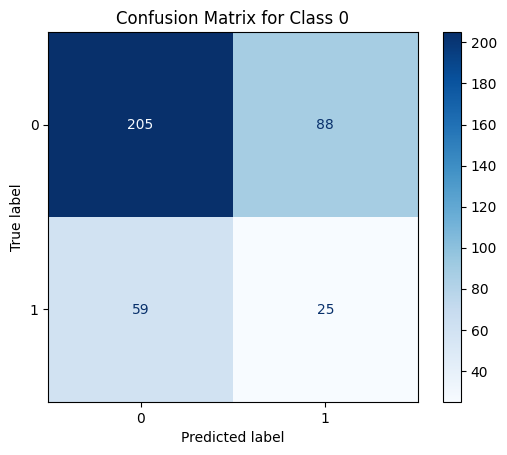

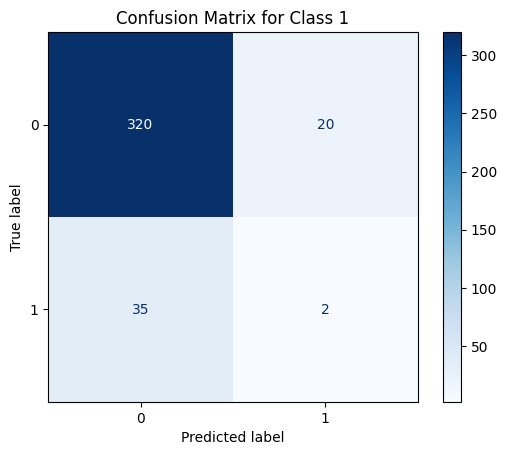

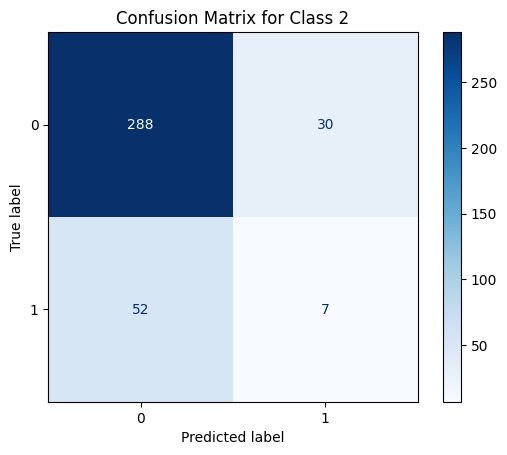

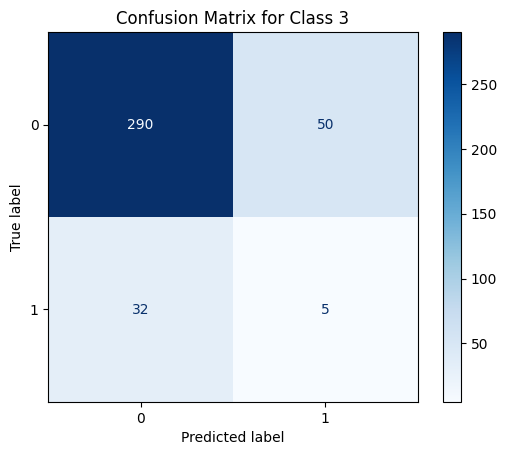

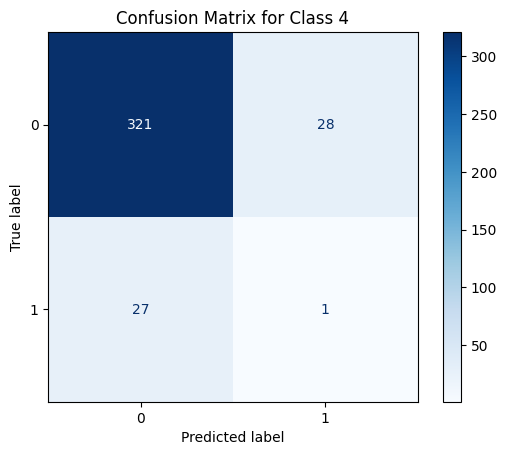

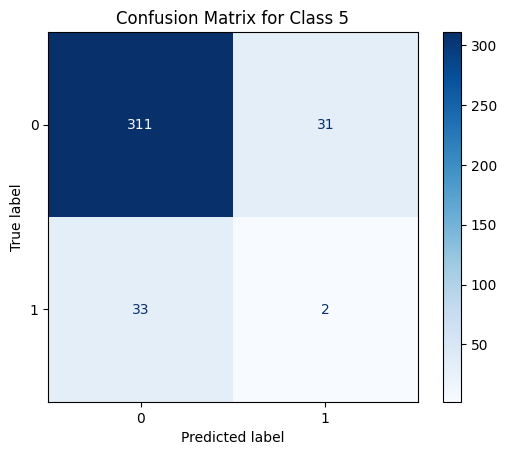

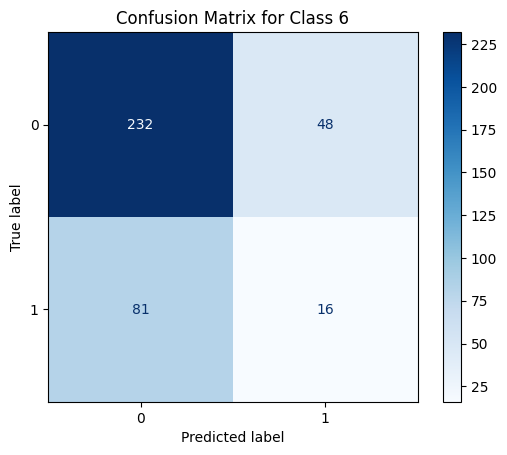

In [ ]:
import numpy as np
from sklearn import tree

cla = tree.DecisionTreeClassifier(random_state=1,criterion='gini', max_depth=16, splitter='random')
cla.fit(X_train, Y_train)

y_pred_train = cla.predict(X_train)
y_pred = cla.predict(X_valid)



from sklearn.metrics import confusion_matrix

for i in range(0,7):
  cm = confusion_matrix(Y_test[:,i], y_pred[:,i])
  cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
  plt.title(f'Confusion Matrix for Class {i}')


plt.show()

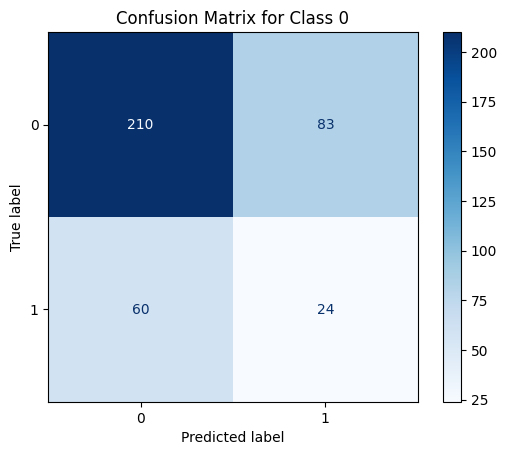

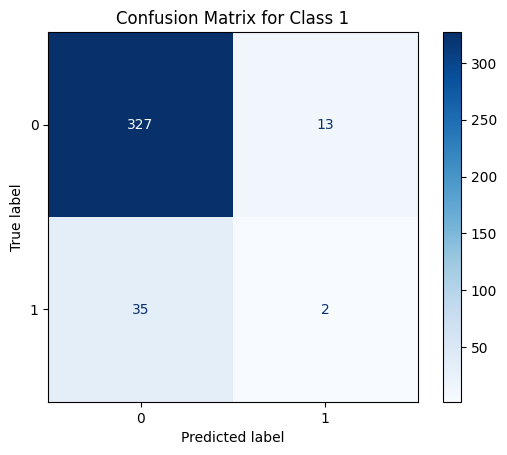

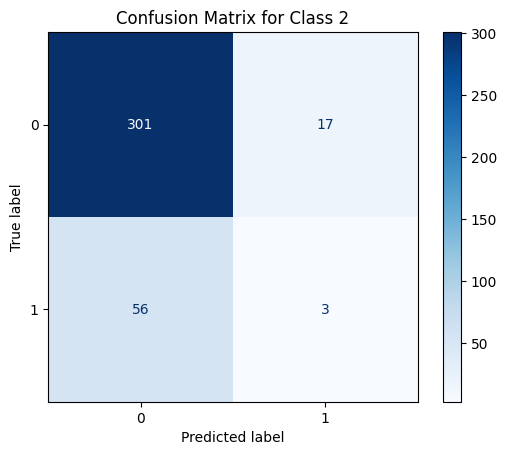

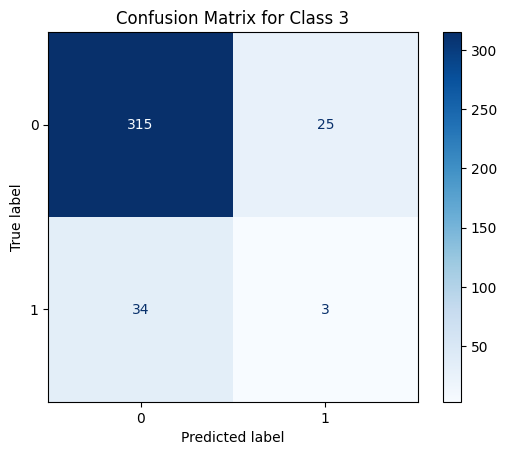

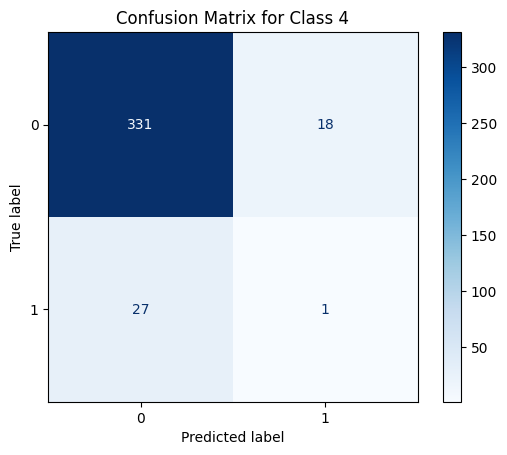

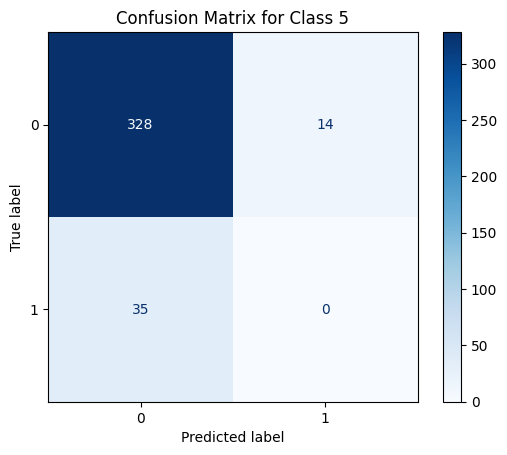

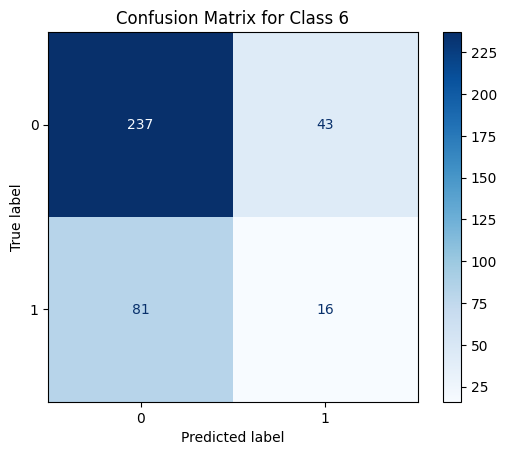

In [ ]:
import numpy as np
from sklearn import ensemble

cla = ensemble.RandomForestClassifier(random_state=1,criterion='log_loss', max_depth=16)
cla.fit(X_train, Y_train)

y_pred_train = cla.predict(X_train)
y_pred = cla.predict(X_valid)



from sklearn.metrics import confusion_matrix

for i in range(0,7):
  cm = confusion_matrix(Y_test[:,i], y_pred[:,i])
  cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
  plt.title(f'Confusion Matrix for Class {i}')


plt.show()

##Dumb

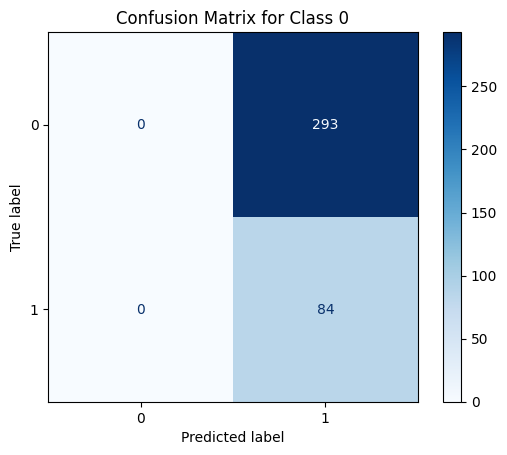

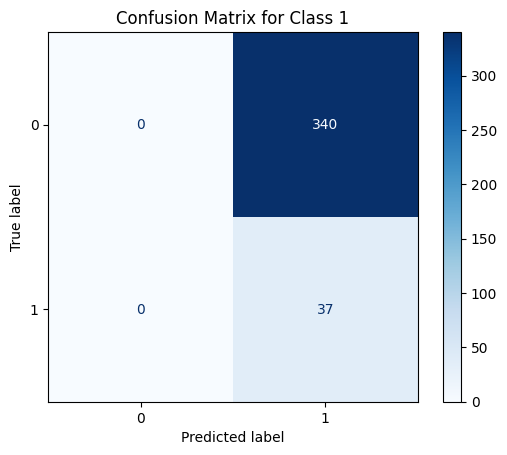

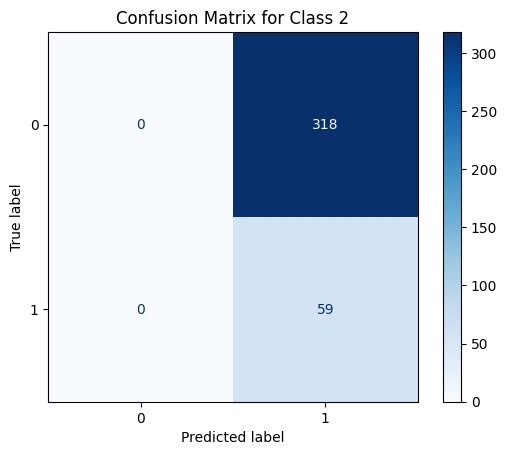

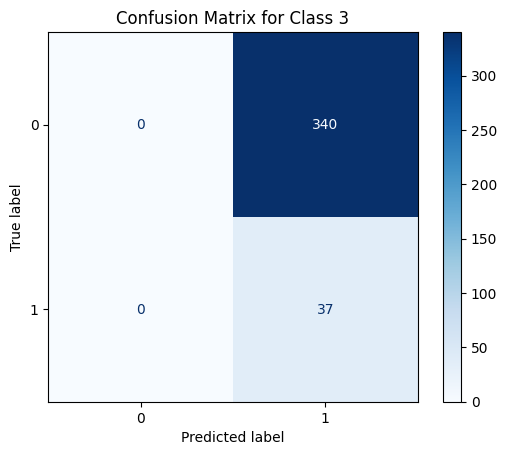

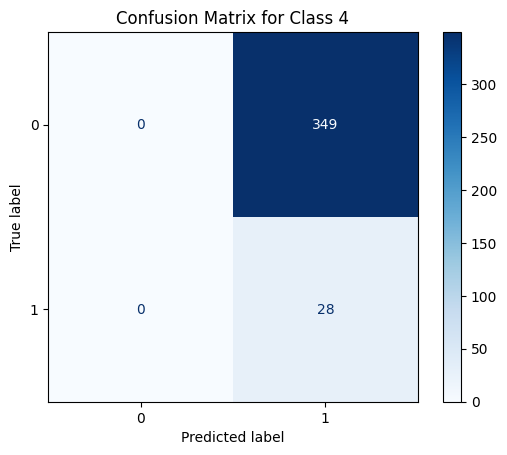

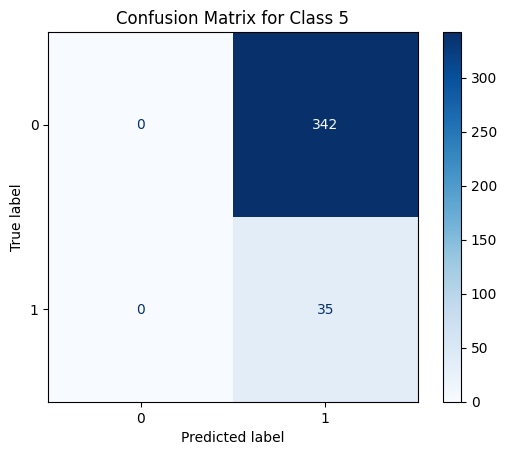

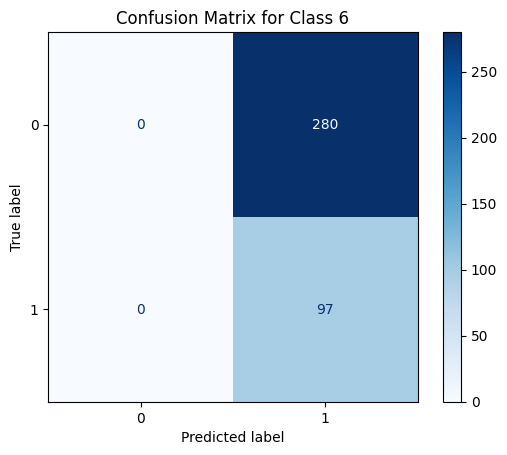

In [ ]:
import numpy as np
from sklearn import tree



cla = tree.DecisionTreeClassifier(random_state=1,criterion='gini', max_depth=16, splitter='random')
cla.fit(X_train, Y_train)

y_pred_train = cla.predict(X_train)
y_pred = np.ones((len(X_valid),7))



from sklearn.metrics import confusion_matrix

for i in range(0,7):
  cm = confusion_matrix(Y_test[:,i], y_pred[:,i])
  cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
  plt.title(f'Confusion Matrix for Class {i}')


plt.show()

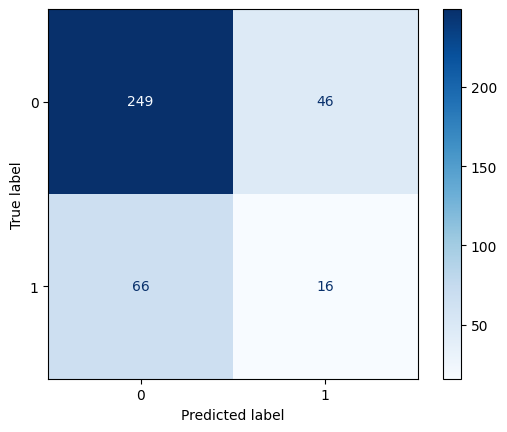

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

##With weights

In [ ]:
import numpy as np
from sklearn import tree

Y_train=y_train>0
Y_test=y_test>0
Y_valid=y_valid>0

cla = tree.DecisionTreeClassifier(random_state=1,max_depth=5, class_weight={0:1,1:1})
cla.fit(X_train, Y_train)

y_pred_train = cla.predict(X_train)
y_pred = cla.predict(X_valid)



from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()


tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
fpr=fp/(fp+tn)
fnr=fn/(fn+tp)

print(tpr)
print(tnr)
print(fpr)
print(fnr)

0.8440677966101695
0.1951219512195122
0.8048780487804879
0.15593220338983052


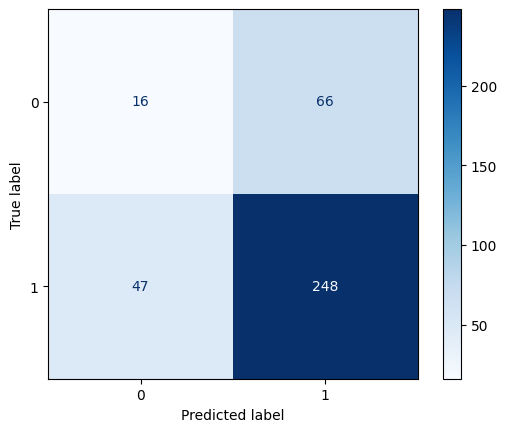

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

#Hipotesis


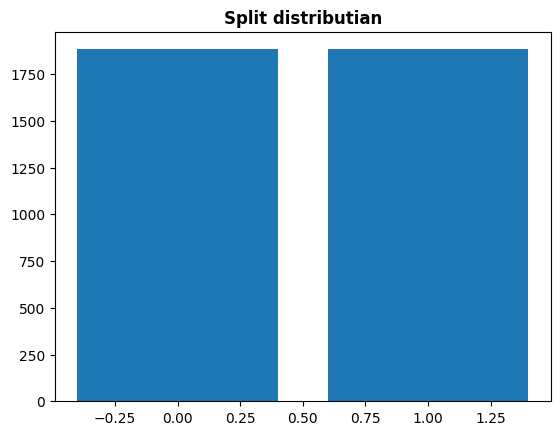

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_names = 'Cannabis'
tests_data = analize_data[feature_names]

cann=tests_data>3
cann.count()
